In [48]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [49]:
#=============================================
# Part A: Convex example (linear regression)
#=============================================
X , y = make_regression(n_samples = 400 , n_features = 10 , noise = 10 , random_state = 42)
lin = LinearRegression().fit(X , y)
y_pred = lin.predict(X)
mse = np.mean((lin.predict(X) - y) ** 2)
X[0:3]
X.shape
y[0:3]
len(y)
lin

array([[-0.92241018,  0.9983109 ,  1.61537569,  1.52131605, -0.32232047,
        -0.36682441, -0.39175815, -0.43162031,  1.21715852, -0.2389321 ],
       [ 0.28872366, -1.13020372, -1.65488744,  0.09337237, -0.9600463 ,
         1.2723535 ,  0.7324921 ,  2.41167668, -0.12270893,  0.26402008],
       [ 0.84742168,  0.70945182, -0.53532819,  0.19049968, -0.09053328,
        -0.12038116, -2.17266955, -0.43548637,  0.33198033,  1.10708067]])

(400, 10)

array([ 122.93400577,   -5.58503906, -128.25227115])

400

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Linear Regression: Predicted vs True')

Text(0.5, 0, 'True y')

Text(0, 0.5, 'Predicted y')

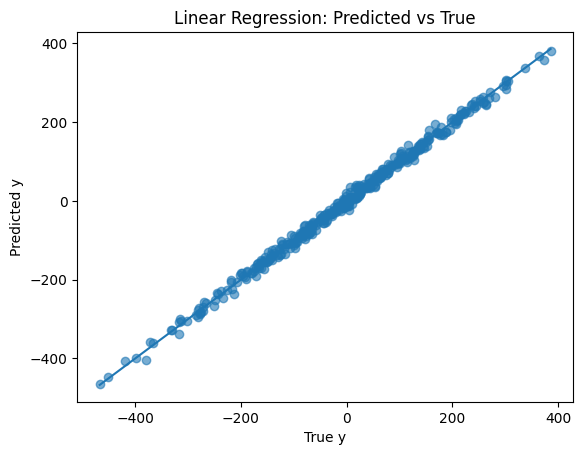

In [50]:
#===========================
# Plot 1: Predicted vs True
#===========================
plt.figure()
plt.scatter(y , y_pred , alpha = 0.6)
mn , mx = min(y.min() , y_pred.min()) , max(y.max() , y_pred.max())
plt.plot([mn , mx] , [mn , mx])
plt.title("Linear Regression: Predicted vs True")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.show()

In [51]:
#====================================================
# Part B: Non-convex objective (many local minima)
# f(w) has multiple valleys because of sin()
#====================================================
def f(w):
    return (w ** 2) + 3 * np.sin(3 * w) + 0.5 * np.sin(9 * w)

def grad_f(w):
    return 2 * w + 9 * np.cos(3 * w) + 4.5 * np.cos(9 * w)

def gradient_descent(w0 , lr = 0.05 , steps = 200):
    w = w0
    ws = [w]
    fs = [f(w)]
    for _ in range(steps):
        w = w - lr * grad_f(w)
        ws.append(w)
        fs.append(f(w))
    return w , f(w) , np.array(ws) , np.array(fs)

In [52]:
w_a , f_a , ws_a , fs_a = gradient_descent(w0 = -2.5)
w_b , f_b , ws_b , fs_b = gradient_descent(w0 = 2.5)
ws_a[0:3]
len(ws_a)
ws_b[0:3]
len(ws_b)
fs_a[0:3]
len(fs_a)
fs_b[0:3]
len(fs_b)

array([-2.5       , -2.20949235, -2.52668161])

201

array([2.5       , 2.29050765, 1.73054244])

201

array([3.67958733, 3.43628838, 3.8364281 ])

201

array([8.82041267, 7.40196169, 0.3990824 ])

201

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Non-Convex Objective: Many Valleys (Local Minima)')

Text(0.5, 0, 'w')

Text(0, 0.5, 'f(w)')

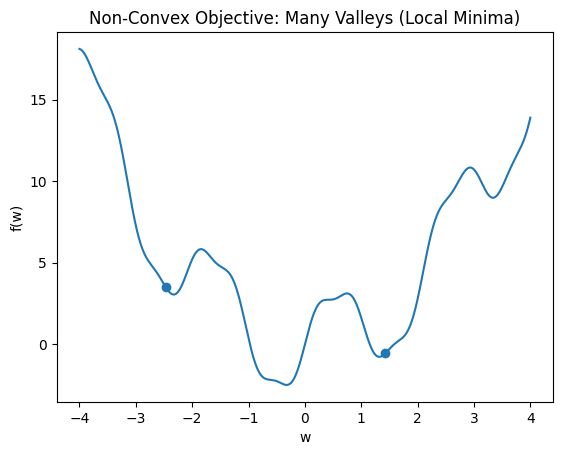

In [53]:
#================================================
# Plot 2: Objective landscape + where GD landed
#================================================
w_grid = np.linspace(-4 , 4 , 2000)
f_grid = f(w_grid)

plt.figure()
plt.plot(w_grid , f_grid)
plt.scatter([w_a , w_b] , [f_a , f_b] , marker = "o")
plt.title("Non-Convex Objective: Many Valleys (Local Minima)")
plt.xlabel("w")
plt.ylabel("f(w)")
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Gradient Descent Trajectory: w vs Iteration')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'w')

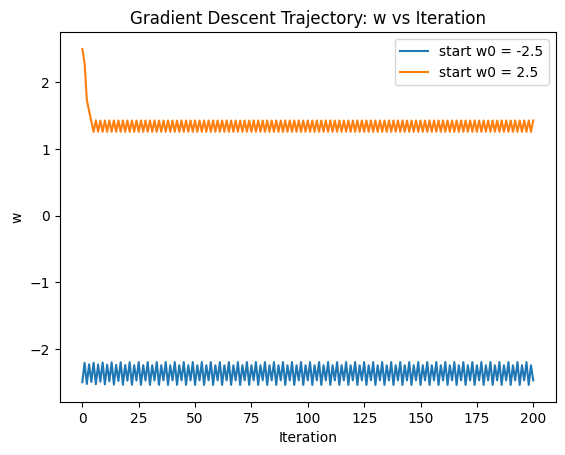

In [54]:
#==================================================
# Plot 3: Parameter trajectory (w over iterations)
#==================================================
plt.figure()
plt.plot(ws_a , label = "start w0 = -2.5")
plt.plot(ws_b , label = "start w0 = 2.5")
plt.title("Gradient Descent Trajectory: w vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("w")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Gradient Descent: f(w) vs Iteration')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'f(w)')

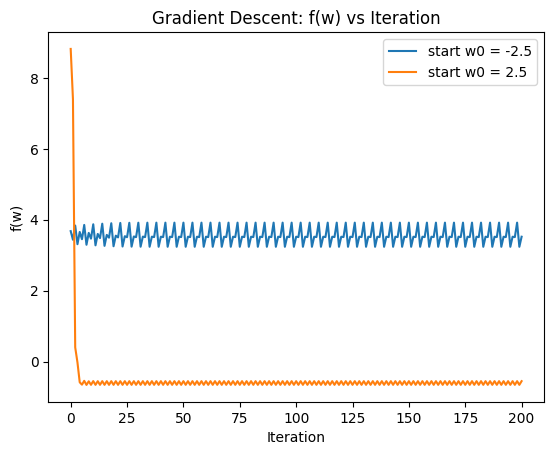

In [55]:
#==========================================
# Plot 4: Objective value over iterations
#==========================================
plt.figure()
plt.plot(fs_a , label = "start w0 = -2.5")
plt.plot(fs_b , label = "start w0 = 2.5")
plt.title("Gradient Descent: f(w) vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("f(w)")
plt.legend()
plt.show()

In [56]:
print("Convex (Linear Regression) -> training MSE: " , round(mse , 2))
print("Non-convex toy objective:")
print("Start w0 = -2.5 -> w* =" , round(w_a , 3) , "| f(w*) =" , round(f_a , 3))
print("Start w0 = 2.5 -> w* =" , round(w_b , 3) , "| f(w*) =" , round(f_b , 3))

Convex (Linear Regression) -> training MSE:  93.69
Non-convex toy objective:
Start w0 = -2.5 -> w* = -2.472 | f(w*) = 3.522
Start w0 = 2.5 -> w* = 1.427 | f(w*) = -0.553
